In [1]:
import numpy as np
import pandas as pd
import os

In [2]:
# Finds range of values used in Jose's case study. Check case_1_explotre.py
csv_path = r'C:\Users\win7\PycharmProjects\Ln_phi_model\Domain_exploration\range_const_T_20200712-172053.csv'
d = pd.read_csv(csv_path, delimiter=',', names=['a_mix', 'b_mix',
                                            'b_1', 'b_2', 'b_3', 'b_4', 'b_5', 'b_6',
                                            'sum_1', 'sum_2', 'sum_3', 'sum_4', 'sum_5', 'sum_6',
                                            'lnphi_1', 'lnphi_2', 'lnphi_3', 'lnphi_4', 'lnphi_5', 'lnphi_6'])

d.tail()

,a_mix,b_mix,b_1,b_2,b_3,b_4,b_5,b_6,sum_1,sum_2,sum_3,sum_4,sum_5,sum_6,lnphi_1,lnphi_2,lnphi_3,lnphi_4,lnphi_5,lnphi_6
4221785,1.386547,0.271303,0.037468,0.082412,0.146782,0.300034,0.489121,0.618392,0.16641,0.468854,0.798893,1.442413,2.394855,3.634564,1.056114,0.478885,-0.072254,-1.004337,-2.577768,-5.226197
4221786,1.386547,0.271303,0.037468,0.082412,0.146782,0.300034,0.489121,0.618392,0.16641,0.468854,0.798893,1.442413,2.394855,3.634564,1.056114,0.478885,-0.072254,-1.004337,-2.577768,-5.226197
4221787,1.386547,0.271303,0.037468,0.082412,0.146782,0.300034,0.489121,0.618392,0.16641,0.468854,0.798893,1.442413,2.394855,3.634564,1.056114,0.478885,-0.072254,-1.004337,-2.577768,-5.226197
4221788,1.386547,0.271303,0.037468,0.082412,0.146782,0.300034,0.489121,0.618392,0.16641,0.468854,0.798893,1.442413,2.394855,3.634564,1.056114,0.478885,-0.072254,-1.004337,-2.577768,-5.226197
4221789,1.386547,0.271303,0.037468,0.082412,0.146782,0.300034,0.489121,0.618392,0.16641,0.468854,0.798893,1.442413,2.394855,3.634564,1.056114,0.478885,-0.072254,-1.004337,-2.577768,-5.226197


In [3]:
d.shape

(4221790, 20)

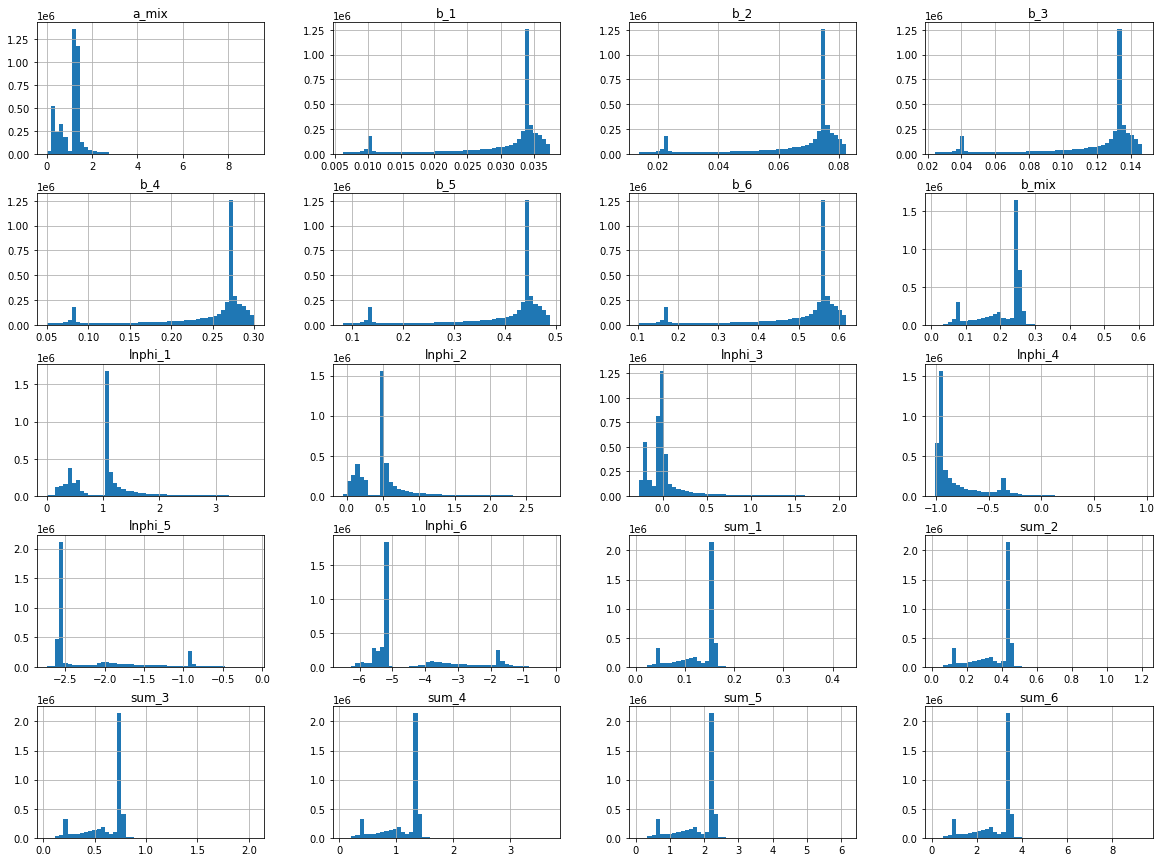

In [5]:
#%matplotlib inline
import matplotlib.pyplot as plt
d.hist(bins=50, figsize=(20,15))
'''.drop(d.loc[:,'lnphi_1':'lnphi_6'], axis=1)'''
plt.show()

In [5]:
f = pd.concat(d.iloc[:,i] for i in range(2,8))
f['b'] = f.describe()
f.loc['b'].rename('b')

count    2.533074e+07
mean     2.196996e-01
std      1.849804e-01
min      6.244605e-03
25%      6.930986e-02
50%      1.348184e-01
75%      3.919390e-01
max      6.183918e-01
Name: b, dtype: float64

In [6]:
f['sum'] = pd.concat(d.iloc[:,i] for i in range(8,14)).describe()
f.loc['sum'].rename('sum')

count    2.533074e+07
mean     1.156043e+00
std      1.044228e+00
min      7.174234e-03
25%      3.588116e-01
50%      7.367075e-01
75%      1.852192e+00
max      9.329801e+00
Name: sum, dtype: float64

In [7]:
f['lnphi'] = pd.concat(d.iloc[:,i] for i in range(14,20)).describe()
f.loc['lnphi'].rename('lnphi')

count    2.533074e+07
mean    -9.868710e-01
std      1.981008e+00
min     -6.504923e+00
25%     -2.446440e+00
50%     -2.252564e-01
75%      4.903100e-01
max      3.682377e+00
Name: lnphi, dtype: float64

In [8]:
tot = d.loc[:,['a_mix', 'b_mix']].describe()
tot

,a_mix,b_mix
count,4.221790e+06,4.221790e+06
mean,1.116909e+00,2.105596e-01
std,5.108118e-01,6.411176e-02
min,1.546243e-02,1.166621e-02
25%,7.193763e-01,1.798959e-01
50%,1.264791e+00,2.467249e-01
75%,1.352073e+00,2.500267e-01
max,9.136394e+00,6.096921e-01


In [9]:
tot = pd.concat([tot, f.loc['b'].rename('b_i')], axis=1)
tot = pd.concat([tot, f.loc['sum'].rename('sum')], axis=1)
tot = pd.concat([tot, f.loc['lnphi'].rename('lnphi')], axis=1)
tot

,a_mix,b_mix,b_i,sum,lnphi
count,4.221790e+06,4.221790e+06,2.533074e+07,2.533074e+07,2.533074e+07
mean,1.116909e+00,2.105596e-01,2.196996e-01,1.156043e+00,-9.868710e-01
std,5.108118e-01,6.411176e-02,1.849804e-01,1.044228e+00,1.981008e+00
min,1.546243e-02,1.166621e-02,6.244605e-03,7.174234e-03,-6.504923e+00
25%,7.193763e-01,1.798959e-01,6.930986e-02,3.588116e-01,-2.446440e+00
50%,1.264791e+00,2.467249e-01,1.348184e-01,7.367075e-01,-2.252564e-01
75%,1.352073e+00,2.500267e-01,3.919390e-01,1.852192e+00,4.903100e-01
max,9.136394e+00,6.096921e-01,6.183918e-01,9.329801e+00,3.682377e+00


In [10]:
tot.T

,count,mean,std,min,25%,50%,75%,max
a_mix,4221790.0,1.116909,0.510812,0.015462,0.719376,1.264791,1.352073,9.136394
b_mix,4221790.0,0.210560,0.064112,0.011666,0.179896,0.246725,0.250027,0.609692
b_i,25330740.0,0.219700,0.184980,0.006245,0.069310,0.134818,0.391939,0.618392
sum,25330740.0,1.156043,1.044228,0.007174,0.358812,0.736707,1.852192,9.329801
lnphi,25330740.0,-0.986871,1.981008,-6.504923,-2.446440,-0.225256,0.490310,3.682377


In [11]:
tot.loc[['min', 'max'],:]


,a_mix,b_mix,b_i,sum,lnphi
min,0.015462,0.011666,0.006245,0.007174,-6.504923
max,9.136394,0.609692,0.618392,9.329801,3.682377
